#### **1.Business Understanding**

As per UC Irvine machine learning repository, this adult datset also known as 'Census Income' dataset is extracted from 1994 census database by Barry Becker. This dataset contains 14 features such as Age, workclass, education, Martial status etc. These features are a mix of continuous & discrete variables. Response variable is individual's income . This is provided as binary to denote whether income is greater than $50,000 or not. 

Our team is planning to utilize this dataset to predict whether a person makes over 50K a year using classifcation algorithms. We expect to use the different metrics such as sensitivity, Specificity, Positive Predictive Value, Negative Predictive Value, AUC-ROC to measure the effectiveness of prediction algorithm. 


 **Importing the census Income dataset**

In [216]:
import pandas as pd

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df = pd.read_csv('adult.data', header=None, names=column_names)

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### **2.Data Understanding**

##### **2.1.Meaning & Type of data for each attribute**

**Meaning of each attribute**

1. **Age**: Age of person in years (continuous).
2. **workclass**: Type of employer (Private, Gov, Self-employed, etc).
3. **fnlwgt**: Final sampling weight - Census population estimation factor.
4. **education**: Highest level of education achieved.
5. **education_num**: Numerical encoding of education level (continuous).
6. **marital_status**: Marital status (Married, Divorced, Never-married, etc).
7. **occupation**: Type of occupation/job.
8. **relationship**: Relationship status in family (Wife, Husband, Not-in-family, etc).
9. **race**: Race (White, Black, Asian-Pac-Islander, etc).
10. **sex**: Gender (Male/Female).
11. **capital_gain**: Capital gains recorded (continuous).
7. **capital_loss**: Capital losses recorded (continuous).
8. **hours_per_week**: Hours worked per week (continuous).
9. **native_country**: Country of origin.
10. **income**: Income category (<=50K or >50K).

**Data Types of Each Attribute:**

In [217]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


**Display basic statistics for each attribute to review their scale** 

In [218]:
print("Numeric Columns:")
print(df.describe())

print("\nCategorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())
    print(f"Unique values: {df[col].nunique()}")

Numeric Columns:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Categorical Columns:

workclass:
 Private    

**Classification of attributes as per their scale used to quantify or categorize them**


**Numerical attributes with Interval scale:**

1.	**education_num**: Represents the number of years of education. Differences are meaningful, but there is no true zero point.
2.	**hours_per_week**: Represents the number of hours worked per week. There is no true zero point.

**Numerical attributes with Ratio scale:**

1.	**age**: Represents the age of individual in years. There is a true zero point, and both differences and ratios are meaningful
2.	**fnlwgt**: Represents the final weight, which is a measure of the number of people the census believes the entry represents. There is a true zero point.
3.	**capital_gain**: Represents the capital gains in dollars. There is a true zero point.
4.	**capital_loss**: Represents the capital losses in dollars. There is a true zero point.


**Categorical attributes with nominal scale:**

1.	**workclass**: Represents the type of employment (e.g., Private, Self-emp-not-inc, etc.). Categories have no inherent order.
2.	**marital_status**: Represents the marital status of the individual (e.g., Married-civ-spouse, Never-married, etc.). Categories have no inherent order.
3.	**occupation**: Represents the type of occupation (e.g., Tech-support, Craft-repair, etc.). Categories have no inherent order.
4.	**relationship**: Represents the individual's relationship status (e.g., Wife, Own-child, etc.). Categories have no inherent order.
5.	**race**: Represents the race of the individual (e.g., White, Black, etc.). Categories have no inherent order.
6.	**sex**: Represents the gender of the individual (e.g., Male, Female). Categories have no inherent order.
7.	**native_country**: Represents the native country of the individual (e.g., United-States, Mexico, etc.). Categories have no inherent order.
8.	**income**: Represents whether the individual's income is greater than or less than $50K (e.g., >50K, <=50K). Categories have no inherent order.

**Categorical attributes with ordinal scale:**

1.	**education**: Ordinal scale. Represents the highest level of education achieved (e.g., Bachelors, HS-grad, etc.). Categories have a meaningful order.



##### **2.2.Data Quality Validation**

**Check for missing values in numercial columns**

In [219]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for missing values in numerical columns
numerical_missing = df[numerical_columns].isnull().sum()
numerical_percentage = (numerical_missing / len(df)) * 100

# Create a summary for numerical columns
numerical_summary = pd.DataFrame({
    'Missing Values': numerical_missing,
    'Percentage': numerical_percentage
})

print("Missing Values Summary for Numerical Columns:")
print(numerical_summary)

Missing Values Summary for Numerical Columns:
                Missing Values  Percentage
age                          0         0.0
fnlwgt                       0         0.0
education_num                0         0.0
capital_gain                 0         0.0
capital_loss                 0         0.0
hours_per_week               0         0.0


**None of the numerical columns in this dataset have missing values.**

Checking the unique values for categorical columns to verify if there are any missing values and display the categorical columns with missing values. 

In [220]:
print("Categorical columns with missing values:")
print("-" * 50)



# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check unique values for each categorical column
for col in categorical_columns:
    missing_count = df[col].str.strip().isin(['?', '', 'NA', 'nan', 'None', ' ']).sum()
    if missing_count > 0:
        print(f"\n{col}:")
        print(df[col].value_counts(dropna=False))
        print(f"Number of unique values: {df[col].nunique()}")
        print("Number of potential missing values:", missing_count)
        print("-" * 50)

Categorical columns with missing values:
--------------------------------------------------

workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
Number of unique values: 9
Number of potential missing values: 1836
--------------------------------------------------

occupation:
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
Number of unique values: 15
Number of potential missing

For exploratory data analysis, we will replace '?' with 'Unknown'. After completing the analysis, we will decide how to handle these missing values before building a machine learning model.

In [221]:
# Create a copy of the original dataframe
df_imputed = df.copy()

# Replace '?' with 'Unknown' in specified columns
columns_to_clean = ['workclass', 'occupation', 'native_country']
df_imputed[columns_to_clean] = df_imputed[columns_to_clean].replace(r'\?', 'Unknown', regex=True)

# Verify the changes
print("Number of '?' values in each column after replacement:")
for col in columns_to_clean:
	question_marks = (df_imputed[col] == '?').sum()
	print(f"{col}: {question_marks}")

Number of '?' values in each column after replacement:
workclass: 0
occupation: 0
native_country: 0


In [222]:
# Check unique values in the cleaned columns
for column in columns_to_clean:
    print(f"\n{column} unique values:")
    print(df_imputed[column].value_counts())
    print(f"Total unique values: {df_imputed[column].nunique()}")
    print("-" * 50)


workclass unique values:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
Total unique values: 9
--------------------------------------------------

occupation unique values:
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
Total unique values: 15
--------------------------------------------------

native_country unique values:
 United-States                 29170
 Mexico              

**Duplicate Data** - This dataset doesn't have any unique identifiers to check for duplicate records since PII (personally identifiable information)  is removed from the dataset for security reasons. 

**Check for outliers in the dataset**

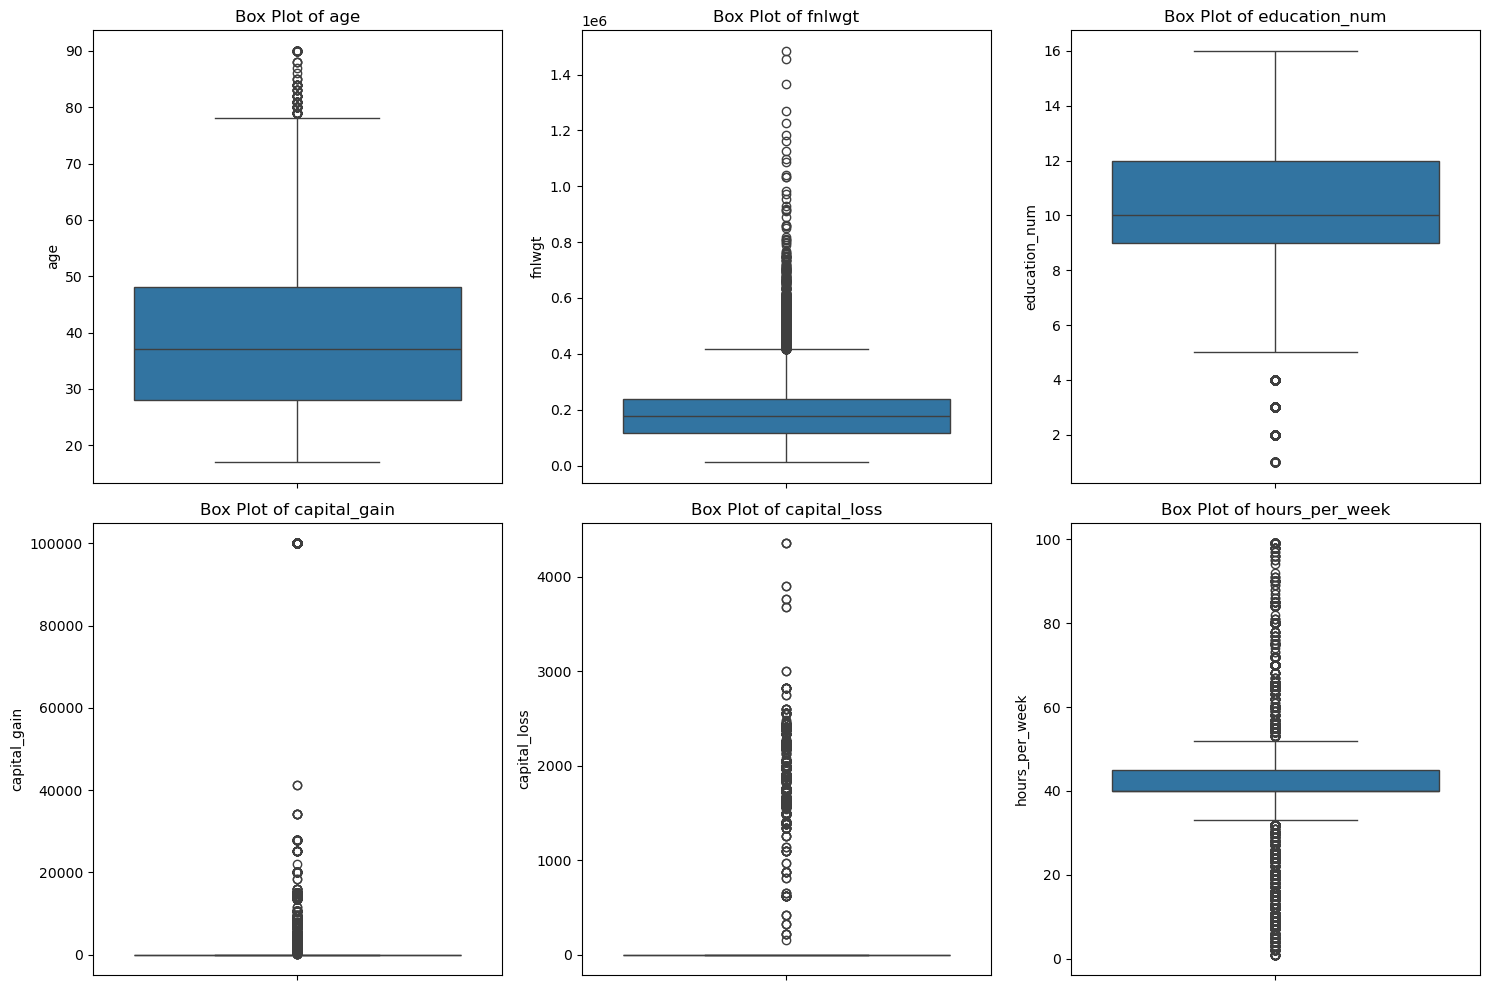


Outliers in age:
Number of outliers: 143
Percentage of outliers: 0.44%
Range of outliers: 79 to 90

Outliers in fnlwgt:
Number of outliers: 992
Percentage of outliers: 3.05%
Range of outliers: 415913 to 1484705

Outliers in education_num:
Number of outliers: 1198
Percentage of outliers: 3.68%
Range of outliers: 1 to 4

Outliers in capital_gain:
Number of outliers: 2712
Percentage of outliers: 8.33%
Range of outliers: 114 to 99999

Outliers in capital_loss:
Number of outliers: 1519
Percentage of outliers: 4.67%
Range of outliers: 155 to 4356

Outliers in hours_per_week:
Number of outliers: 9008
Percentage of outliers: 27.66%
Range of outliers: 1 to 99


In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get numerical columns
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for box plots
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_imputed[col])
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate statistics to identify outliers using IQR method
for col in numerical_cols:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)][col]
    
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df_imputed))*100:.2f}%")
    print(f"Range of outliers: {outliers.min()} to {outliers.max()}")


**Review of Outliers in BoxPlot**

**Age:** Persons with age from 79 to 90 and might not have active income based on employment. doesn't seem to be an issue in the data.

**fnlwgt:** Persons with fnlwgt of 415913 to 1484705. could be high networth individuals and doesn't seem to be an issue in the data.

**education_num:** Persons with education_num from 1 to 4. Seem to be the persons with low eduction background. This might have an impact in income. To be reivewed in later analysis.

**capital_gain:** People with capital gain from 144 to 99999. These are calculated as outliers since most of the people in data doesn't have any capital gain. doesn't seem to be a real issue in the data. 

**capital_loss:** People with capital loss from 155 to 4356. These are calculated as outliers since most of the people in data doesn't have any capital gain. doesn't seem to be a real issue in the data. 

**hours per week:** 28% of the people in the data have hours per week less than 35 or greater than 50 (approximately)and considered as outliers. Range of these outliers is from 1 hour to 35 & 50 to 99 hours.



##### **2.3.Visualization of appropriate statistics(mean, median, variance,counts)for numerical columns**

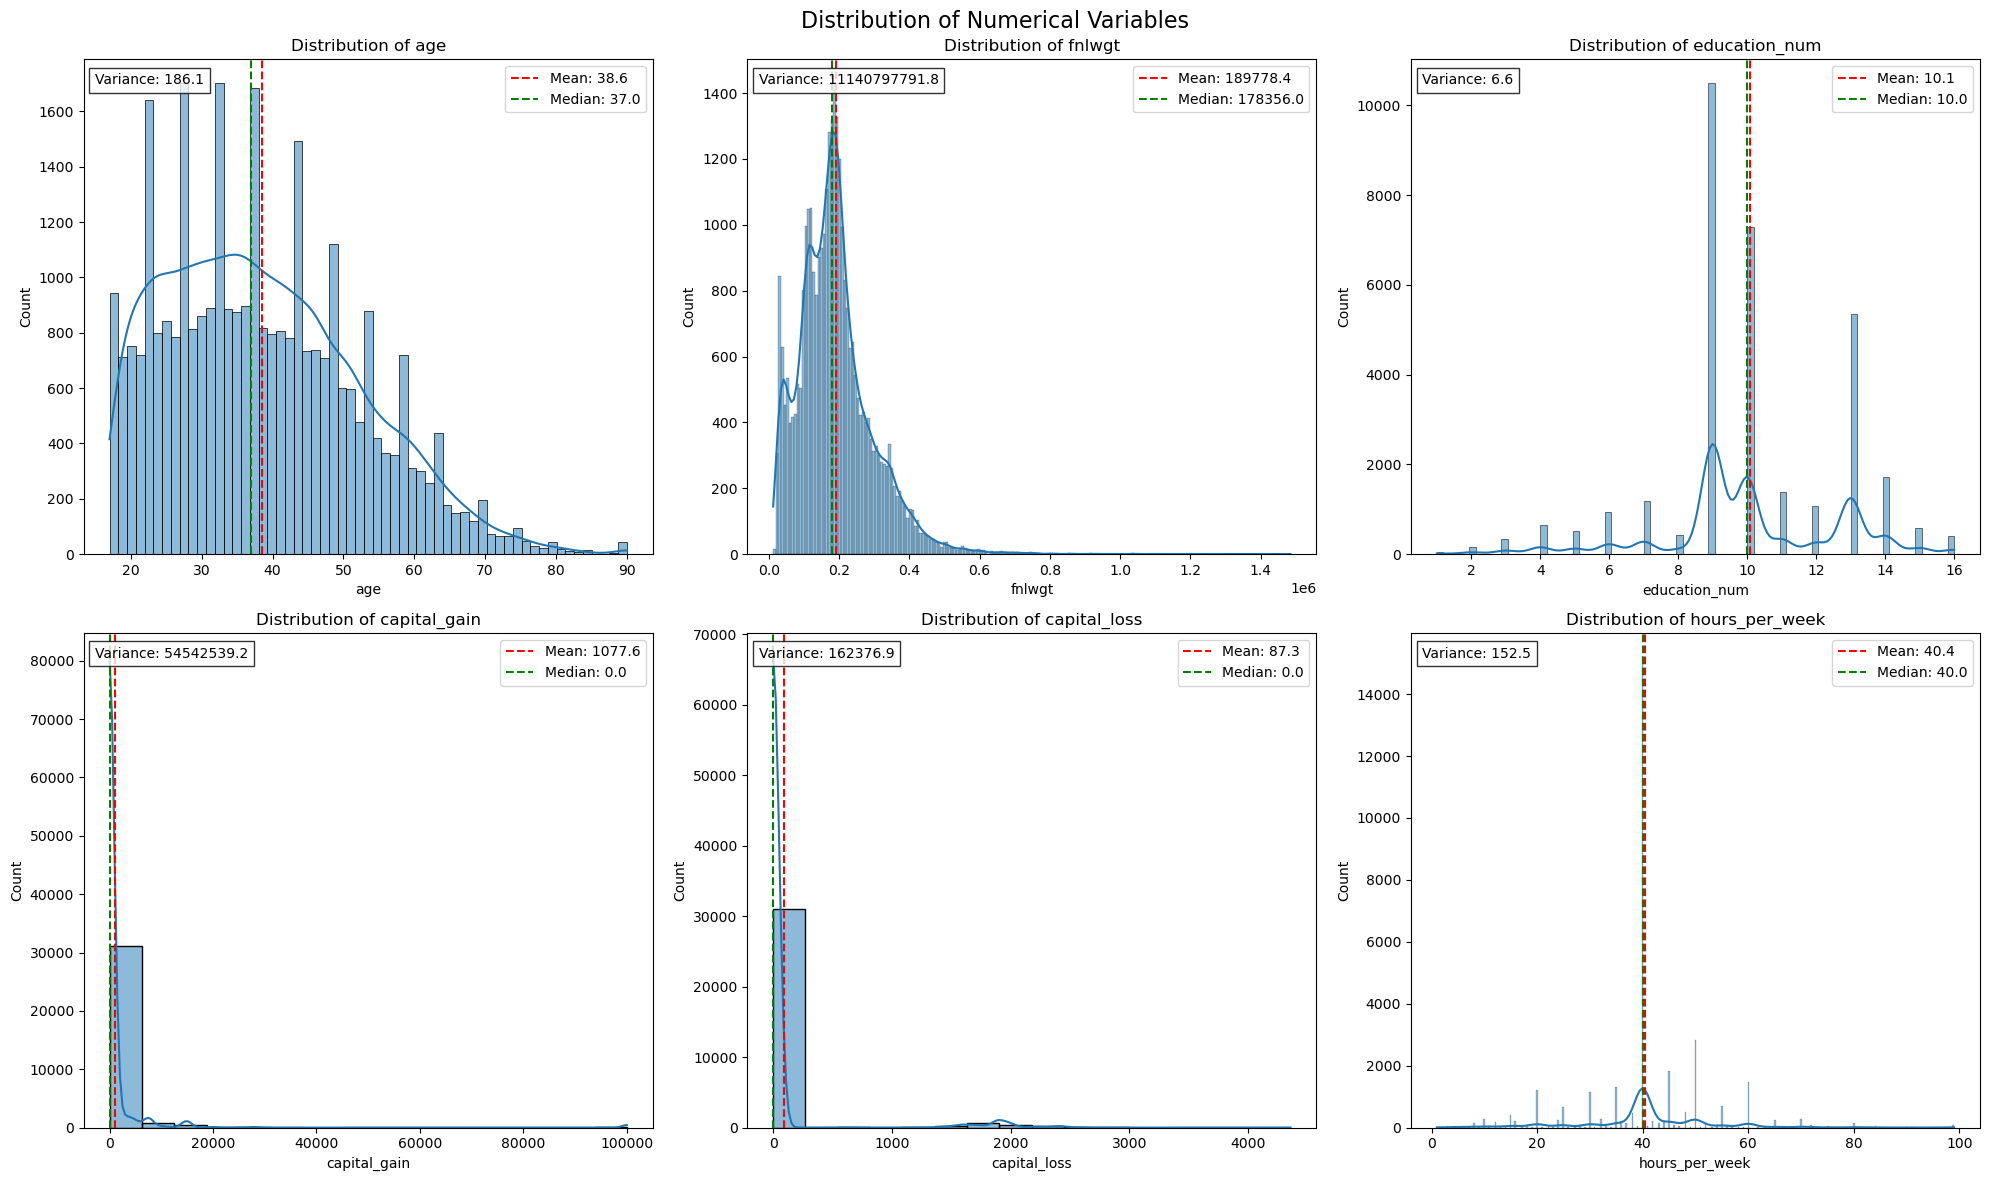

In [224]:


# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Flatten axes array for easier iteration
axes = axes.ravel()

# Create histograms and boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    
    # Calculate statistics
    mean = df_imputed[col].mean()
    median = df_imputed[col].median()
    var = df_imputed[col].var()
    
    # Create histogram with KDE
    sns.histplot(data=df_imputed, x=col, kde=True, ax=axes[i])
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
    axes[i].axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
    
    # Add text annotation for variance
    axes[i].text(0.02, 0.95, f'Variance: {var:.1f}', 
                transform=axes[i].transAxes,
                bbox=dict(facecolor='white', alpha=0.8))
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

**Key Insights**

1.**Distribution of age:**

- Mean: 38.6, Median: 37.0
- The distribution is slightly right-skewed.
- Most individuals fall within the range of 20–50 years.There are fewer individuals above the age of 70, with very few outliers near 90.

2.**Distribution of fnlwgt (Final Weight):**
- Mean: 189778.4, Median: 178356.0
- The data is highly right-skewed, as the mean is significantly higher than the median.
- A large number of individuals have lower values of fnlwgt, while higher values are sparse but create the long tail.

3.**Distribution of education_num:**
- Mean: 10.1, Median: 10.0
- The distribution is almost symmetric, with mean and median nearly identical.
- The peaks in the distribution suggest specific common education levels, such as 10 (most frequent), 13, and 9.

4.**Distribution of capital_gain:**
- Mean: 1077.6, Median: 0.0
- Highly right-skewed, with a large number of zeros,indicating no capital gains for most individuals.
- The variance is very high due to a few extreme values, causing the long tail.

5.**Distribution of capital_loss:**
- Mean: 87.3, Median: 0.0
- Similar to capital_gain, this variable is also highly right-skewed.
- Most individuals report no capital loss (values at 0), with very few extreme values creating the long tail.

6.**Distribution of hours_per_week:**
- Mean: 40.4, Median: 40.0
- The distribution is symmetric and centered around 40 hours, aligning with typical full-time workweek expectations.
- There are a few observations beyond 60 hours, indicating outliers or individuals working overtime.


##### **2.4.Visualization of Interesting attributes**

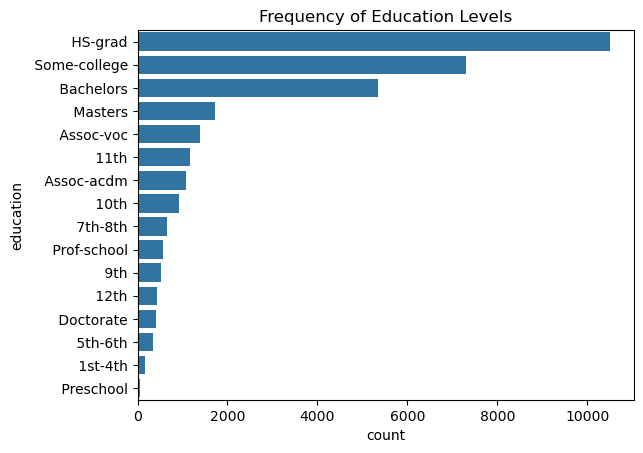

In [225]:
# Education - Bar Chart
sns.countplot(data=df_imputed, y='education', order=df_imputed['education'].value_counts().index)
plt.title('Frequency of Education Levels')
plt.show()

**Significance:**: This visualization is important to identify the educational diversity in the dataset and any dominant categories.

**Interpretation:** Majority of the people in this dataset have completed one of the following eductioin level: HS-grad, Some-College & Bachelors 

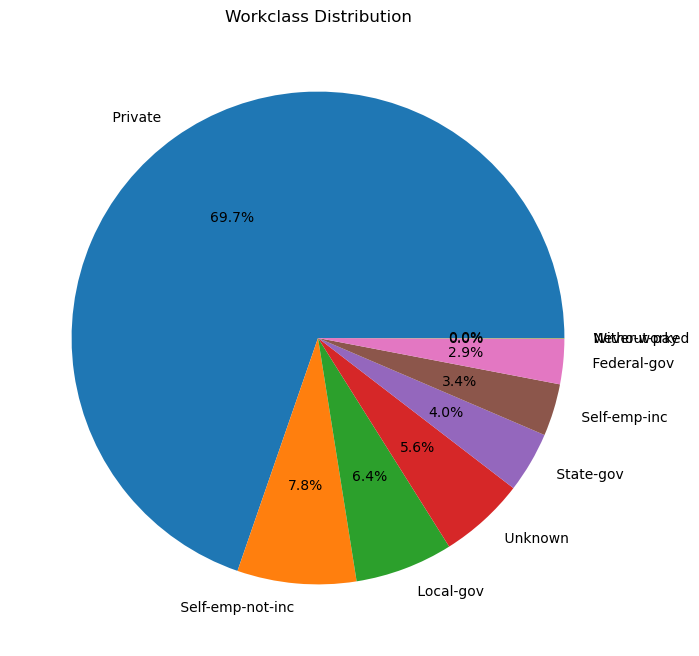

In [226]:
# Workclass - Pie Chart
df_imputed['workclass'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Workclass Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

**Significance**: This visualization helps analyze the distribution of job categories and identify the prevalence of specific work classes.

**Interpretation** 
- The majority of the workclass distribution (69.7%) is comprised of "Private" workers.
- Smaller categories include "State-gov" (5.6%), "Self-emp-inc" (4.0%), and "Federal-gov" (2.9%).

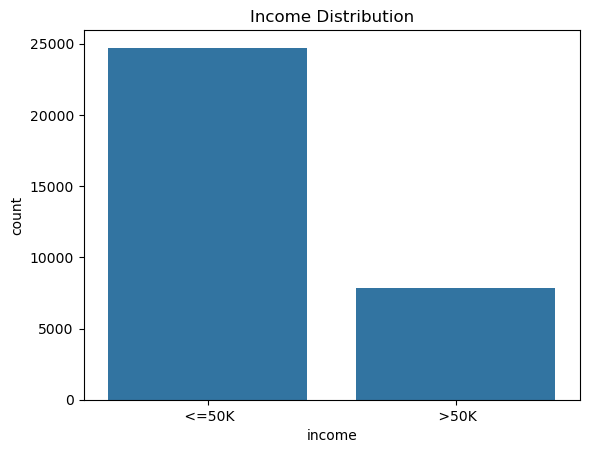

In [227]:
# Income - Countplot
sns.countplot(data=df_imputed, x='income')
plt.title('Income Distribution')
plt.show()

**Significance**: This visualization highlights the class distribution in the target variable. This is important to determine if the dataset is imbalanced, which may affect the performance of predictive models. 

**Interpretation** 
- Majority of the people in dataset are earning $50k or less. This captures the uneven income distribution in the dataset. 

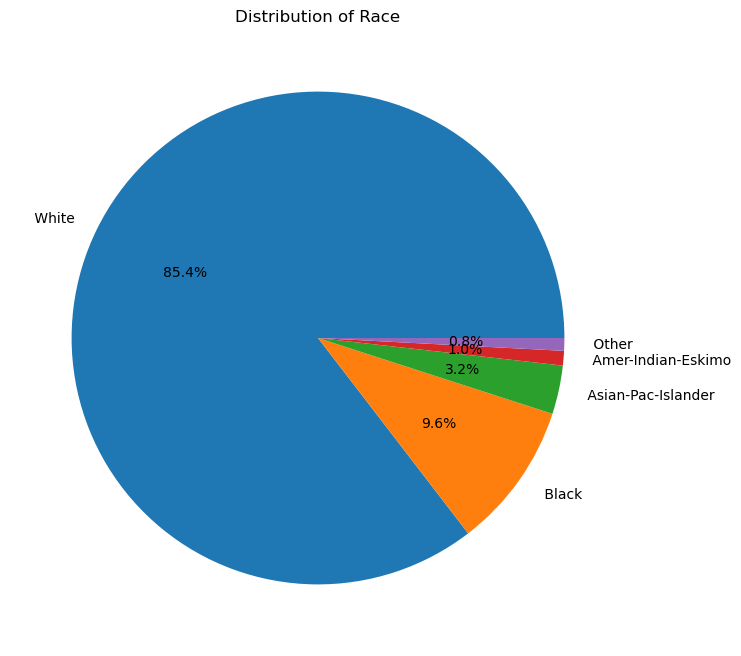

In [228]:
# Create pie chart for race distribution
plt.figure(figsize=(10, 8))
df_imputed['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Race')
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.show()

**Significance**: This visualization helps analyze the distribution of race in the dataset and identify the prevalence of specific races.

**Interpretation** 
- Majority of population in the dataset belongs to white race. 
- Smaller categories include "Other" (0.8%), "Amer-Indian-Eskimo" (1.0%).

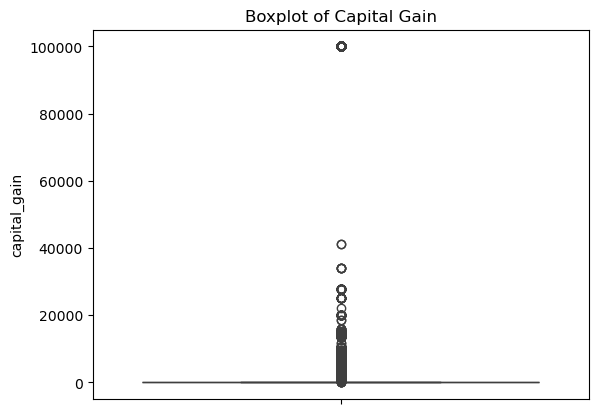

In [229]:
# Capital Gain - Boxplot
sns.boxplot(data=df_imputed, y='capital_gain')
plt.title('Boxplot of Capital Gain')
plt.show()

**Significance**: This visualization helps us to understand the spread and potential outliers in capital gain. This helps to analyse if this would be the important feature in predicting the income

**Interpretation:** Most of the population has 0 capital gain except for a few outliers. This suggests that capital gain may not be a significant feature in predicting income, but the outliers could be important.

##### **2.5 Visualizing relationships between attributes**

In [ ]:
# Create a figure with multiple subplots for scatterplots
plt.figure(figsize=(20, 20))
numerical_vars = ['age', 'fnlwgt','education_num', 'hours_per_week', 'capital_gain', 'capital_loss']
plot_count = 1

for i in range(len(numerical_vars)):
    for j in range(i+1, len(numerical_vars)):
        plt.subplot(5, 3, plot_count)
        sns.scatterplot(data=df_imputed, 
                       x=numerical_vars[i], 
                       y=numerical_vars[j], 
                       hue='income',
                       alpha=0.5)
        plt.title(f'{numerical_vars[i]} vs {numerical_vars[j]}')
        plot_count += 1

plt.tight_layout()
plt.show()

**Key Insights from Scatter Plot Analysis**

- None of the numerical predictors are linearly related with each other.
- Higher education levels are strongly associated with higher income levels (>50k). This indicates that education could be one of the important predictor in this dataset. 
- Increase in capital loss and capital gain are associated with higher income levels (>50k).
- Increase in age is slightly associated with reduction with fnlwgt.

**Checking the correlation between numerical variables**

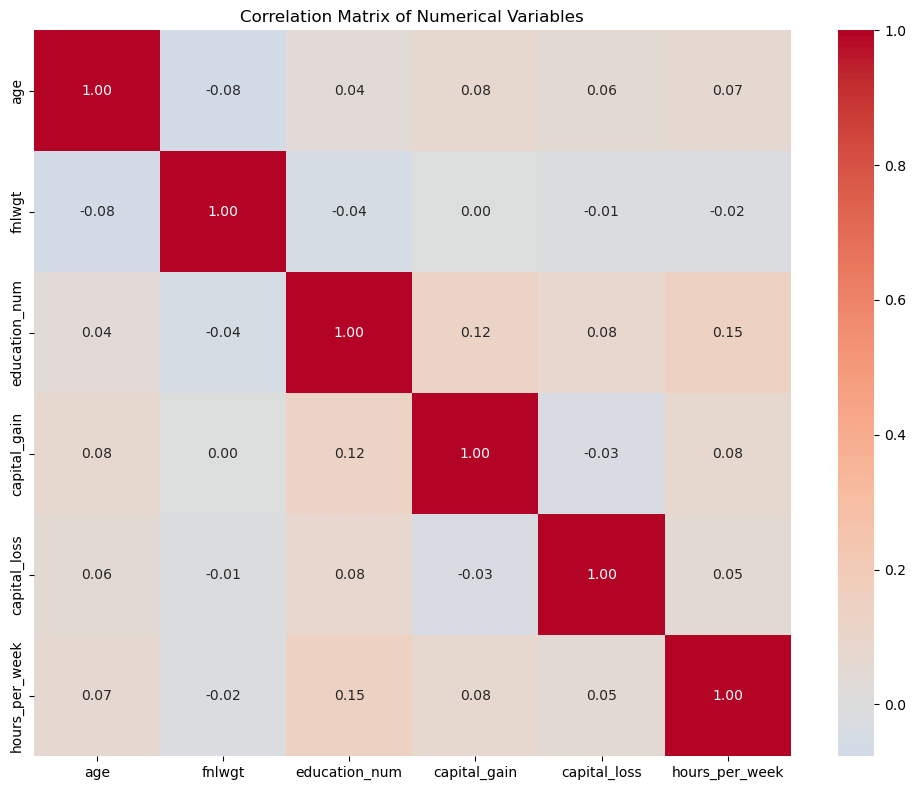

In [174]:
# Calculate correlation matrix for numerical variables
correlation_matrix = df_imputed[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

None of the numerical variables are linearly correlated with each other hence we do not see significant positive / negative correlation between any of these variables in correlation matrix. 

**Distribution of hours per week across workclass, Race and Sex**

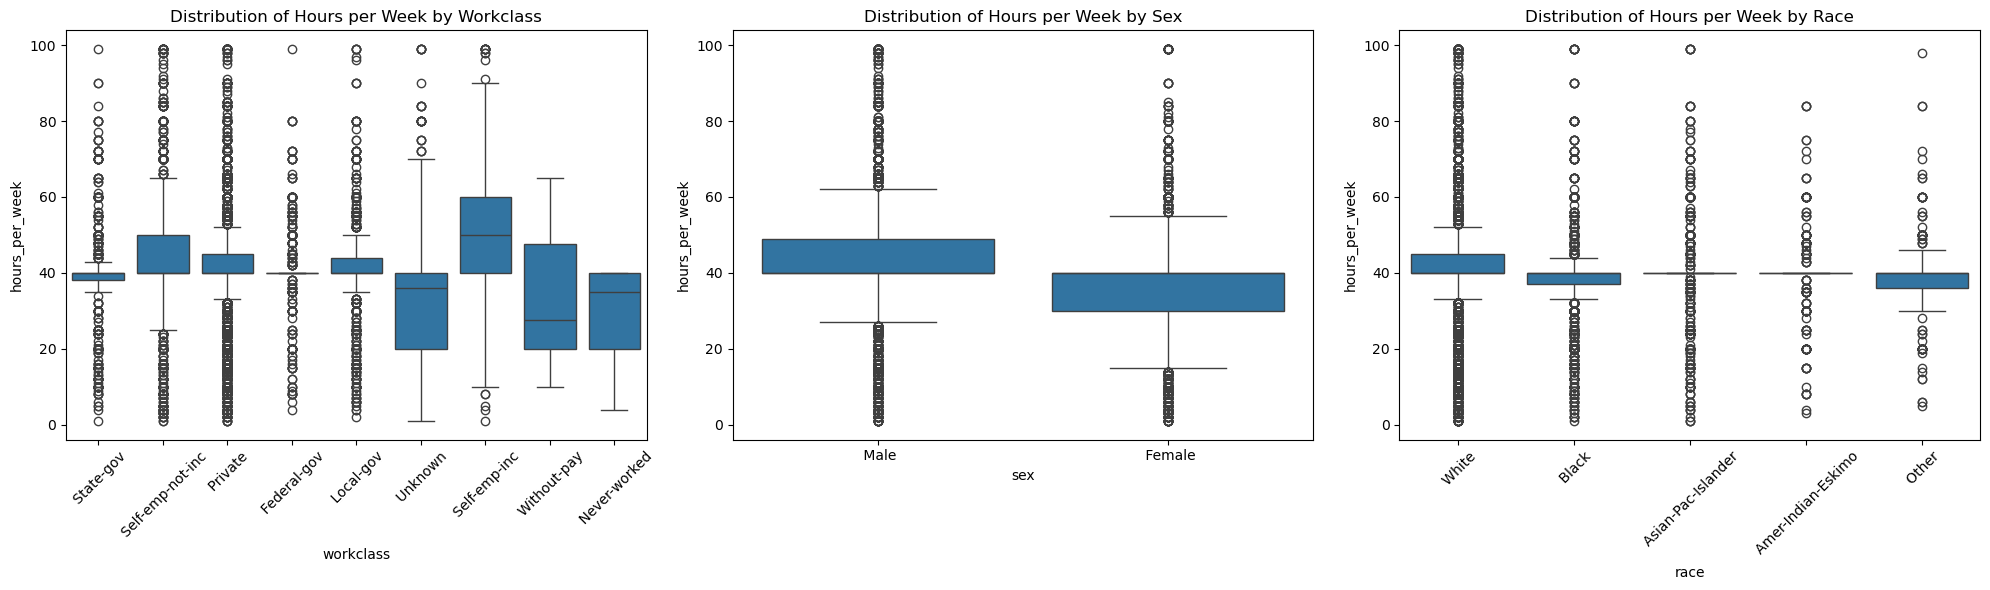

In [175]:
import warnings
warnings.filterwarnings('ignore')

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot hours_per_week distribution by workclass
sns.boxplot(data=df_imputed, x='workclass', y='hours_per_week', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Distribution of Hours per Week by Workclass')

# Plot hours_per_week distribution by sex
sns.boxplot(data=df_imputed, x='sex', y='hours_per_week', ax=axes[1])
axes[1].set_title('Distribution of Hours per Week by Sex')

# Plot hours_per_week distribution by race
sns.boxplot(data=df_imputed, x='race', y='hours_per_week', ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set_title('Distribution of Hours per Week by Race')

plt.tight_layout()
plt.show()

**Insights** 

- Private employees are working more hours per week compared to government employees. Would be interesting to see if income level of privaate employees is more than government employees due to this.
- Median hours per week is lesser for females compared to Male .It would be interesting to analyse the income levels for Male and Female separately to see if this impacts the income level of different sexes.
- Median hours per week seems to be slightly lesser for blacks compared to other races. 

**Marital Status vs Hours per week**

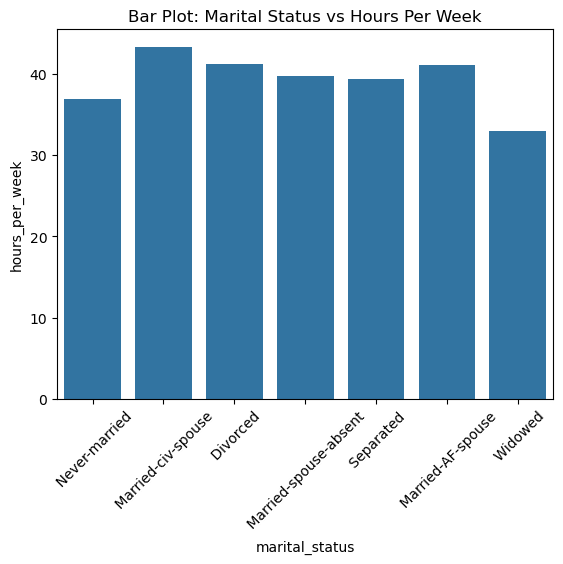

In [178]:
sns.barplot(data=df_imputed, x='marital_status', y='hours_per_week', errorbar=None)
plt.xticks(rotation=45)
plt.title('Bar Plot: Marital Status vs Hours Per Week')
plt.show()

**Insight:** There is not much difference in hours per week between different marital statuses. 

**Marital status description by Sex**

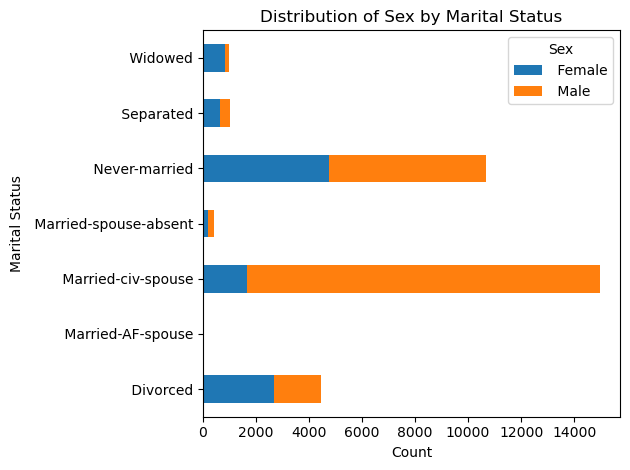

In [179]:
crosstab = pd.crosstab(df_imputed['marital_status'], df_imputed['sex'])
crosstab.plot(kind='barh', stacked=True)
plt.title('Distribution of Sex by Marital Status')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

The data suggests traditional marriage patterns with males being the majority in civilian marriages, while showing more balanced gender ratios in never-married and divorced categories.

**Racial distribution across Occupations**

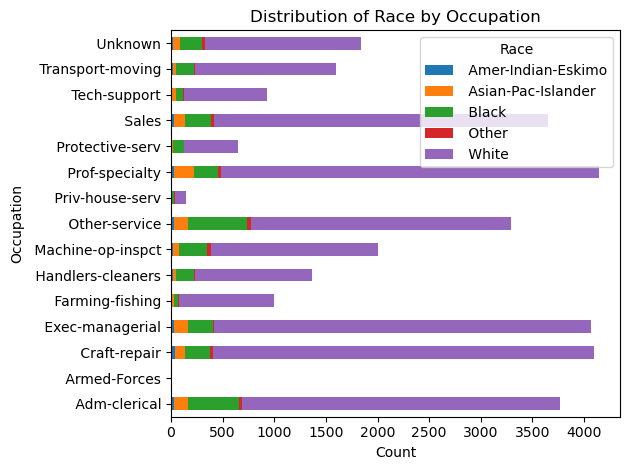

In [ ]:
crosstab = pd.crosstab(df_imputed['occupation'], df_imputed['race'])
crosstab.plot(kind='barh', stacked=True)
plt.title('Distribution of Race by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

**Key patterns:**

- White individuals dominate most occupations, especially in Prof-specialty, Exec-managerial, and Craft-repair
- Black representation is highest in Adm-clerical and Other-service roles
- Asian-Pacific-Islander shows notable presence in Prof-specialty and Tech-support

Notable disparity exists between white and minority representation in higher-paying professional and managerial positions versus service-oriented roles.

##### **2.6 Relationship between features and response class**

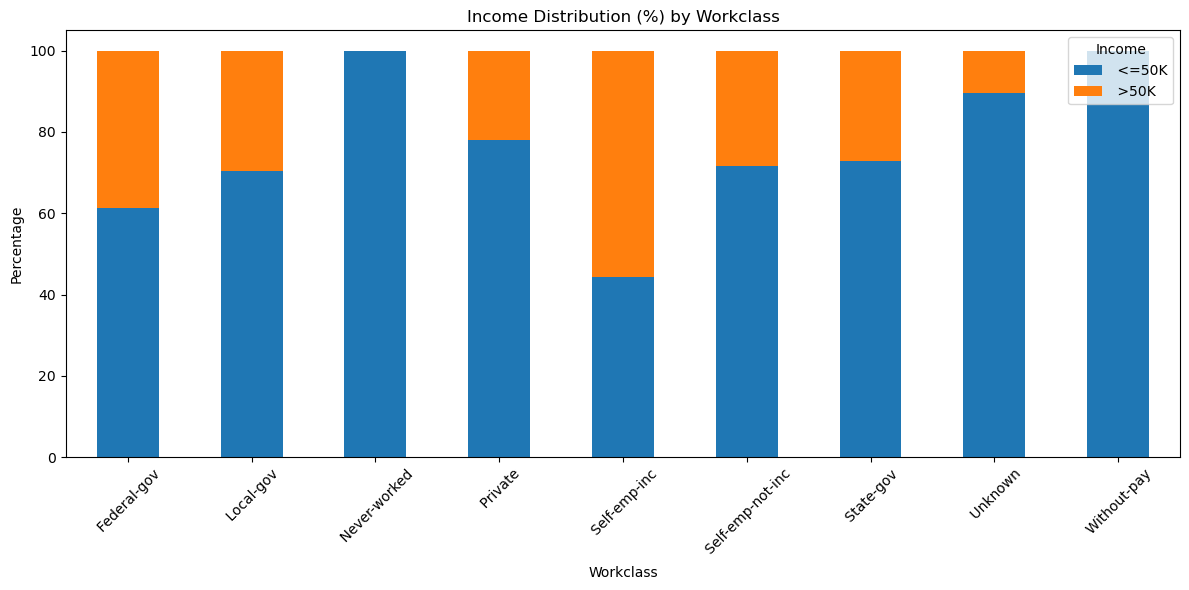

In [ ]:
# Create income distribution percentages
crosstab = pd.crosstab(df_imputed['workclass'], df_imputed['income'], normalize='index') * 100

# Create bar plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Income Distribution (%) by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.tight_layout()
plt.show()



**Key observations from income distribution by workclass:**

Self employeed and government employees have more % of people with income greater than 50k compard to self employed or private employees.

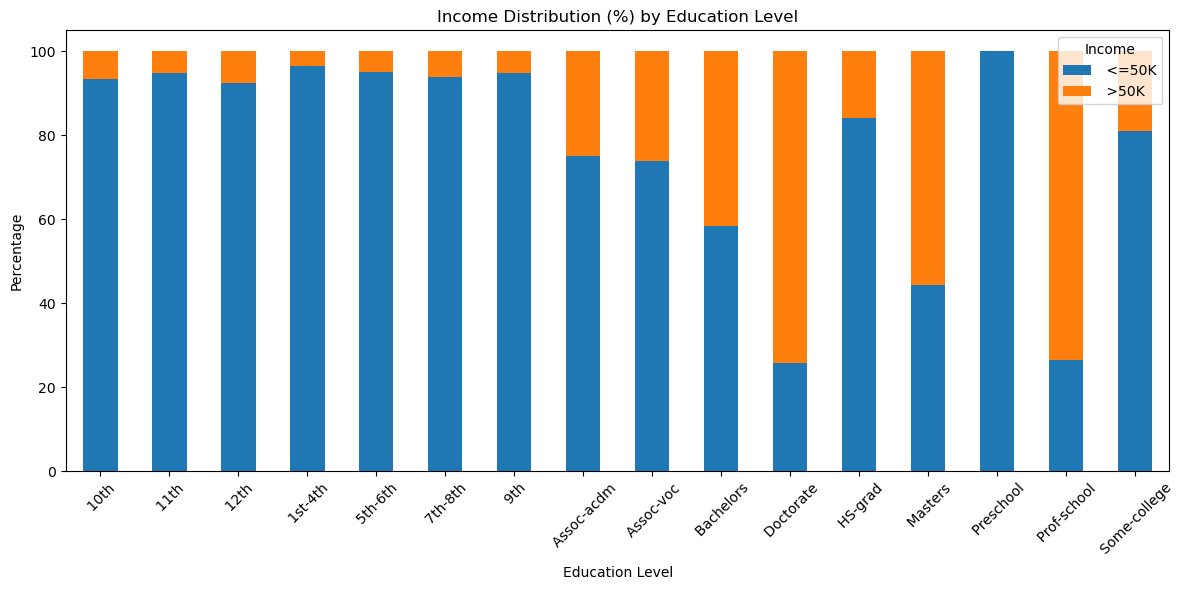

In [182]:
# Create income distribution percentages for education
crosstab = pd.crosstab(df_imputed['education'], df_imputed['income'], normalize='index') * 100

# Create bar plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Income Distribution (%) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.tight_layout()
plt.show()


**Key observations from income distribution by education level:**

1. Advanced Degrees such as Doctorate, Professional School & Masters Show Highest Income Levels.
2. Lower Education Shows Limited High Income.(ex: Preschool, 1st-4th grade)
3. Income levels consistently increase with education level.

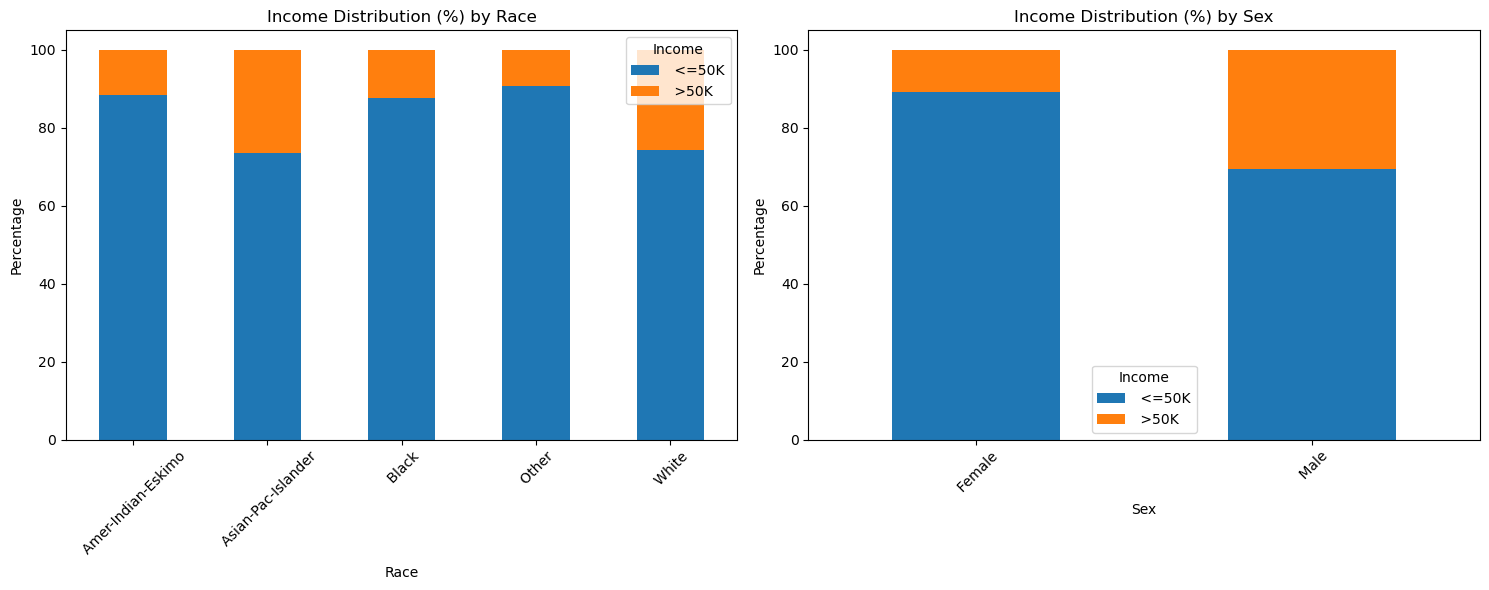

In [183]:
# Create income distribution percentages for race and sex
race_crosstab = pd.crosstab(df_imputed['race'], df_imputed['income'], normalize='index') * 100
sex_crosstab = pd.crosstab(df_imputed['sex'], df_imputed['income'], normalize='index') * 100

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot income distribution by race
race_crosstab.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Income Distribution (%) by Race')
ax1.set_xlabel('Race')
ax1.set_ylabel('Percentage')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Income')

# Plot income distribution by sex
sex_crosstab.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Income Distribution (%) by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Income')

plt.tight_layout()
plt.show()

**Key observations from Income Distribution by Race and Sex:**

1. **Gender Distribution:**
    - Only 10.9% of females earn >50K compared to 30.6% of males
    - There is a significant gender pay gap in the dataset
    - Males are almost 3 times more likely to earn >50K than females

2. **Race Distribution:**
    - White and Asian-Pac-Islander populations have higher percentages of >50K income (25.6% and 26.6% respectively)
    - Other racial groups show significantly lower percentages of high income:
      - Amer-Indian-Eskimo: 11.6%
      - Black: 12.4%
      - Other: 9.2%
    - There are notable disparities in income levels across different racial groups

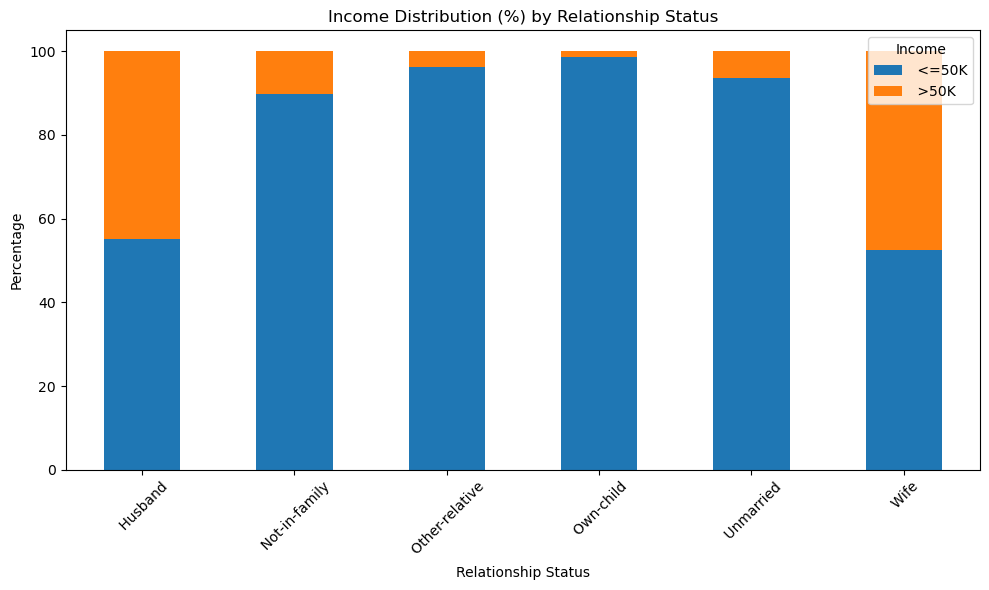

In [184]:
# Create income distribution percentages for relationship status
crosstab = pd.crosstab(df_imputed['relationship'], df_imputed['income'], normalize='index') * 100

# Create bar plot with percentage stacking
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Income Distribution (%) by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.tight_layout()
plt.show()


**Key observations from Income Distribution by Relationship Status:**

1. Married couples (Husband/Wife) have significantly higher percentage of >50K income.
2. Other relationship categories show much lower percentages of high income.
3. There is a clear disparity between married and unmarried individuals, with married people being 4-5 times more likely to earn >50K compared to other relationship categories.

**Distribution of numeric variables by Income**

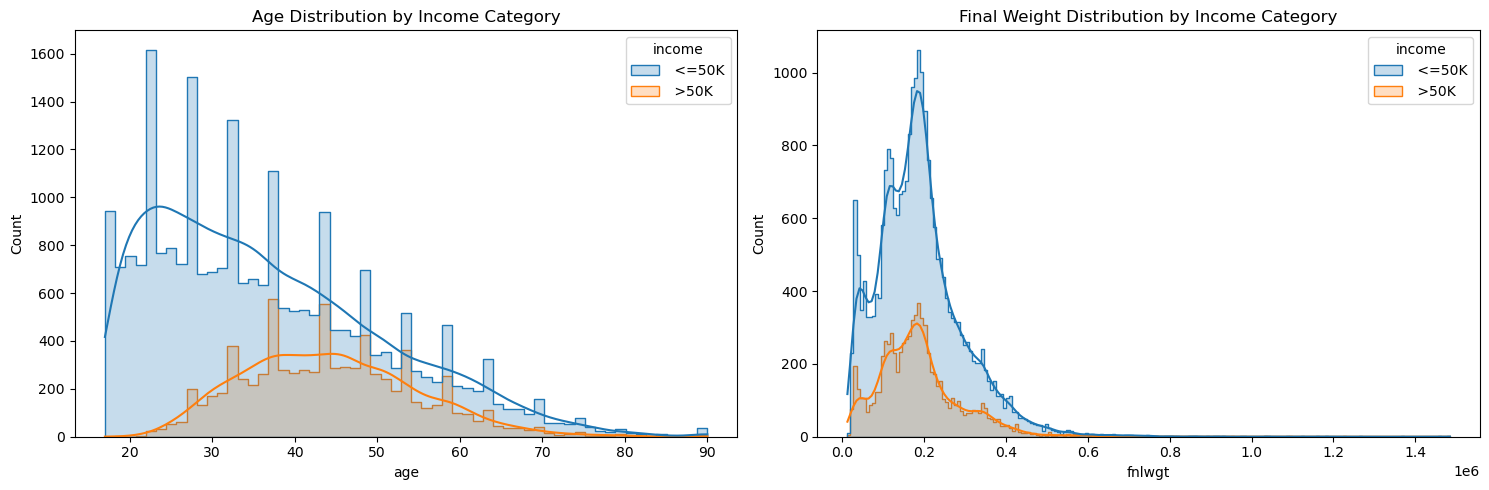

In [ ]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot age distribution
sns.histplot(data=df_imputed, x='age', hue='income', kde=True, element='step', ax=ax1)
ax1.set_title('Age Distribution by Income Category')

# Plot fnlwgt distribution
sns.histplot(data=df_imputed, x='fnlwgt', hue='income', kde=True, element='step', ax=ax2)
ax2.set_title('Final Weight Distribution by Income Category')

plt.tight_layout()
plt.show()



1. **Age Distribution:**
    - Age ranges primarily from 20 to 60 years
    - Higher income (>50K) is more common in 35-50 age group
    - Lower income (≤50K) peaks in younger age group (25-30)
    - Very few people under 25 or over 65 earn >50K

2. **Final Weight (fnlwgt):**
    - Right-skewed distribution
    - No significant difference in distribution between income groups, suggesting this feature might not be strongly predictive of income.
    - Most values concentrated between 100,000 and 300,000

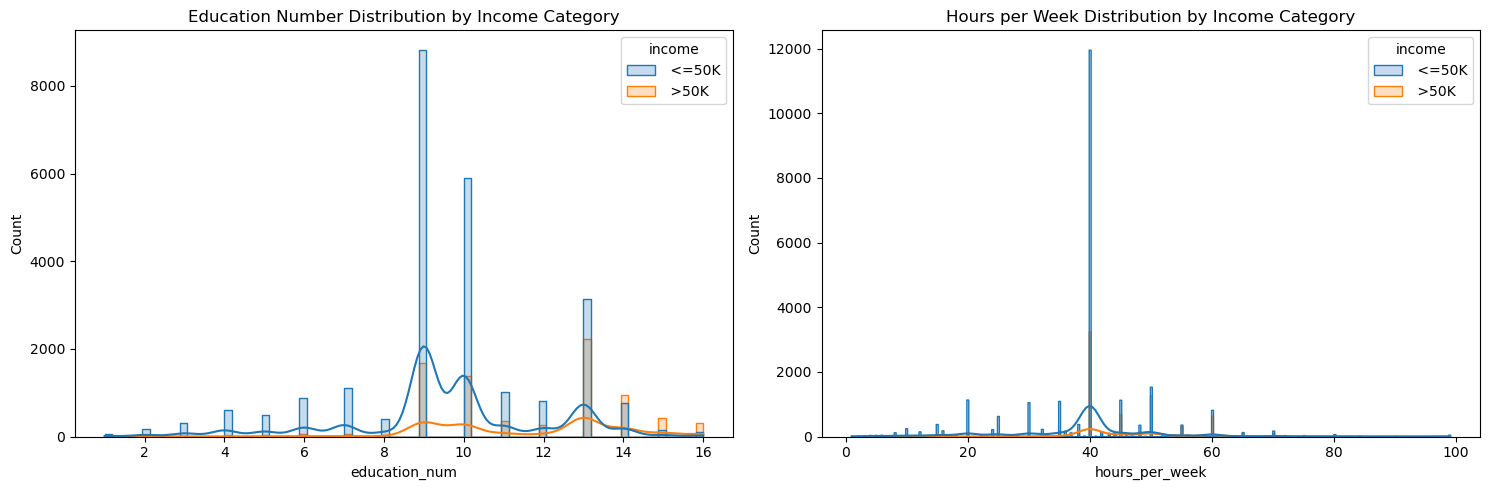

In [189]:
# Create figure with two subplots side by side 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot education_num distribution
sns.histplot(data=df_imputed, x='education_num', hue='income', kde=True, element='step', ax=ax1)
ax1.set_title('Education Number Distribution by Income Category')

# Plot hours_per_week distribution  
sns.histplot(data=df_imputed, x='hours_per_week', hue='income', kde=True, element='step', ax=ax2)
ax2.set_title('Hours per Week Distribution by Income Category')

plt.tight_layout()
plt.show()

3. **Education Number:**
    - Higher education levels strongly correlate with higher income
    - Most people have education number between 8-12
    - People with education number >12 are more likely to earn >50K

4. **Hours per Week:**
    - Centers around 40 hours (standard work week)
    - People earning >50K tend to work slightly more hours
    - Significant outliers in both directions (below 20 and above 60 hours)
    - Working more hours shows some correlation with higher income

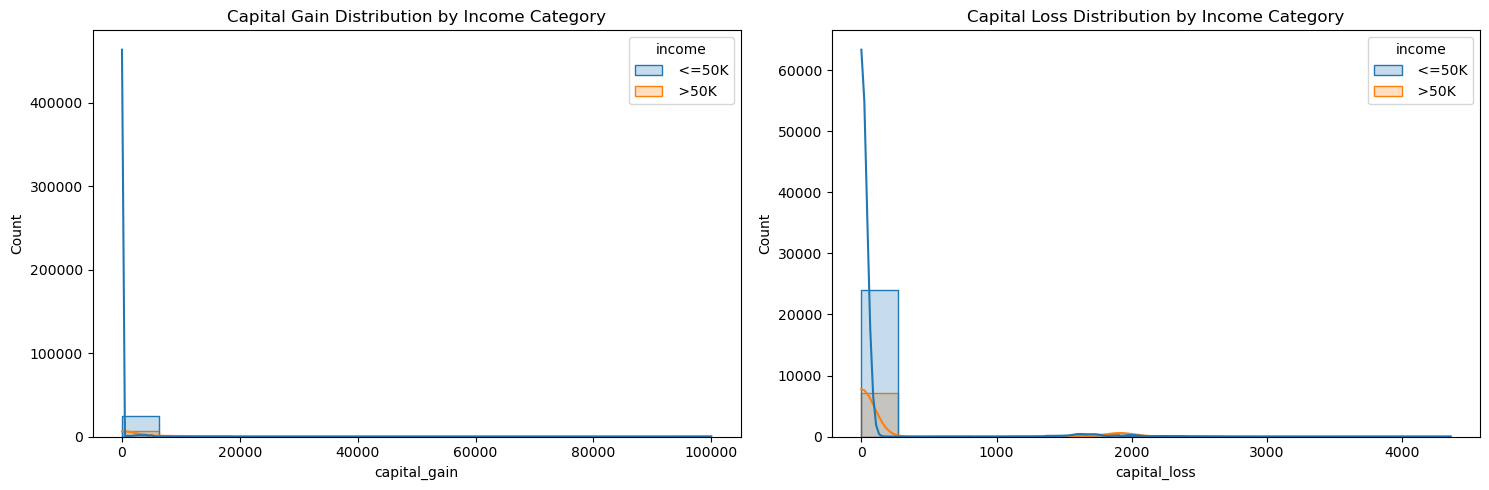

In [190]:
# Create figure with two subplots side by side 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot capital_gain distribution
sns.histplot(data=df_imputed, x='capital_gain', hue='income', kde=True, element='step', ax=ax1)
ax1.set_title('Capital Gain Distribution by Income Category')

# Plot capital_loss distribution  
sns.histplot(data=df_imputed, x='capital_loss', hue='income', kde=True, element='step', ax=ax2)
ax2.set_title('Capital Loss Distribution by Income Category')

plt.tight_layout()
plt.show()

5. **Capital Gain:**
    - Extremely right-skewed
    - Most people (>75%) have zero capital gains
    - Higher capital gains generally associated with >50K income
    - Few extreme outliers above 20,000

6. **Capital Loss:**
    - Similar to capital gain, highly right-skewed
    - Majority have zero capital loss
    - Some correlation between capital loss and higher income
    - Outliers present but less extreme than capital gains

##### **2.7 Adding new features**

In [ ]:
# Create a copy of the dataframe to add new features
df_new = df_imputed.copy()

# 1. Create age groups (may reveal income patterns in different age ranges)
df_new['age_group'] = pd.cut(df_new['age'], 
                            bins=[0, 25, 35, 45, 55, 65, 100],
                            labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# 2. Create total capital feature (combine gain and loss)
df_new['total_capital'] = df_new['capital_gain'] - df_new['capital_loss']

# 3. Work type category (combining similar workclass categories)

# First, clean the workclass column by stripping whitespace
df_new['workclass'] = df_new['workclass'].str.strip()

df_new['work_type'] = df_new['workclass'].replace({
    'Private': 'Private',
    'Self-emp-inc': 'Self_Employed',
    'Self-emp-not-inc': 'Self_Employed',
    'Federal-gov': 'Government',
    'State-gov': 'Government',
    'Local-gov': 'Government',
    'Without-pay': 'No_Income',
    'Never-worked': 'No_Income',
    'Unknown': 'Unknown'
})

# 4. Work intensity (based on hours per week)
df_new['work_intensity'] = pd.cut(df_new['hours_per_week'],
                                 bins=[0, 20, 35, 45, 60, 100],
                                 labels=['Part_Time', 'Light', 'Normal', 'Extra', 'Workaholic'])

# 5. Education level (simplified)
# First, clean the education column by stripping whitespace
df_new['education'] = df_new['education'].str.strip()

education_mapping = {
    'Preschool': 'Basic',
    '1st-4th': 'Basic',
    '5th-6th': 'Basic',
    '7th-8th': 'Basic',
    '9th': 'Basic',
    '10th': 'Basic',
    '11th': 'Basic',
    '12th': 'Basic',
    'HS-grad': 'High_School',
    'Some-college': 'High_School',
    'Assoc-voc': 'Associates',
    'Assoc-acdm': 'Associates',
    'Bachelors': 'Bachelors',
    'Masters': 'Advanced',
    'Doctorate': 'Advanced',
    'Prof-school': 'Advanced'
}

# Ensure all values are mapped by checking unique values
all_education_values = df_new['education'].unique()
for edu in all_education_values:
    if edu not in education_mapping:
        print(f"Warning: '{edu}' not found in mapping")

df_new['education_level'] = df_new['education'].map(education_mapping)

# Verify the mapping
print("\nUnique values in education_level after mapping:")
print(df_new['education_level'].unique())

# 6. Has_capital (binary feature for whether person has any capital gains or losses)
df_new['has_capital'] = ((df_new['capital_gain'] > 0) | (df_new['capital_loss'] > 0)).astype(int)

# 7. Family_worker (binary feature for whether person is married and working)
df_new['family_worker'] = ((df_new['relationship'].isin(['Husband', 'Wife'])) & 
                          (df_new['workclass'] != 'Without-pay')).astype(int)

print("New features created. Shape of new dataframe:", df_new.shape)
print("\nNew columns added:", 
      [col for col in df_new.columns if col not in df_imputed.columns])





Unique values in education_level after mapping:
['Bachelors' 'High_School' 'Basic' 'Advanced' 'Associates']
New features created. Shape of new dataframe: (32561, 22)

New columns added: ['age_group', 'total_capital', 'work_type', 'work_intensity', 'education_level', 'has_capital', 'family_worker']


In [212]:
print("Sample rows of newly added columns:")
print("\nNew features:")
print(df_new[['age_group', 'total_capital', 'work_type', 'work_intensity', 'education_level', 'has_capital', 'family_worker']].head())

Sample rows of newly added columns:

New features:
  age_group  total_capital      work_type work_intensity education_level  \
0     36-45           2174     Government         Normal       Bachelors   
1     46-55              0  Self_Employed      Part_Time       Bachelors   
2     36-45              0        Private         Normal     High_School   
3     46-55              0        Private         Normal           Basic   
4     26-35              0        Private         Normal       Bachelors   

   has_capital  family_worker  
0            1              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  


##### **3. Additional Analysis**

**3.1 Feature importance analysis using Random Forest**

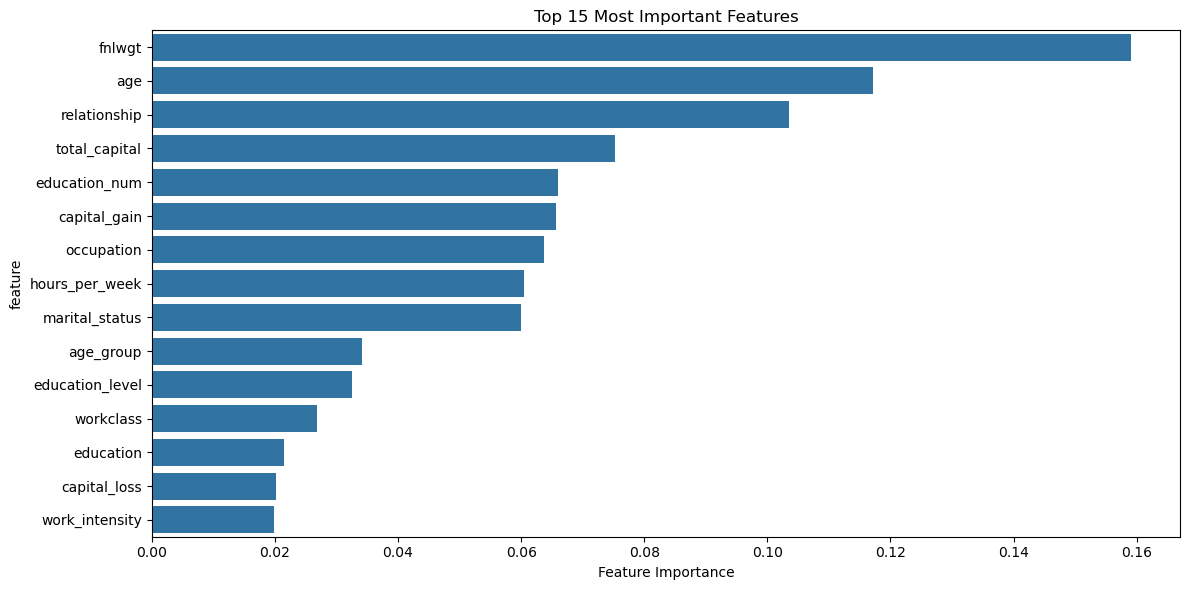


Top 15 Feature Importance Scores:
            feature  importance
2            fnlwgt    0.159078
0               age    0.117091
7      relationship    0.103469
15    total_capital    0.075171
4     education_num    0.066026
10     capital_gain    0.065651
6        occupation    0.063659
12   hours_per_week    0.060417
5    marital_status    0.060020
14        age_group    0.034108
18  education_level    0.032463
1         workclass    0.026905
3         education    0.021536
11     capital_loss    0.020193
17   work_intensity    0.019870


In [213]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt

# Create a copy of the dataframe to avoid modifying the original
df_model = df_new.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 
                   'relationship', 'race', 'sex', 'native_country', 'work_type', 
                   'education_level']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Convert age_group and work_intensity from category to numeric
df_model['age_group'] = df_model['age_group'].cat.codes
df_model['work_intensity'] = df_model['work_intensity'].cat.codes

# Prepare features and target
X = df_model.drop(['income'], axis=1)
y = le.fit_transform(df_model['income'])

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print feature importance scores
print("\nTop 15 Feature Importance Scores:")
print(feature_importance.head(15))

**3.2 Additinoal analysis using new features**

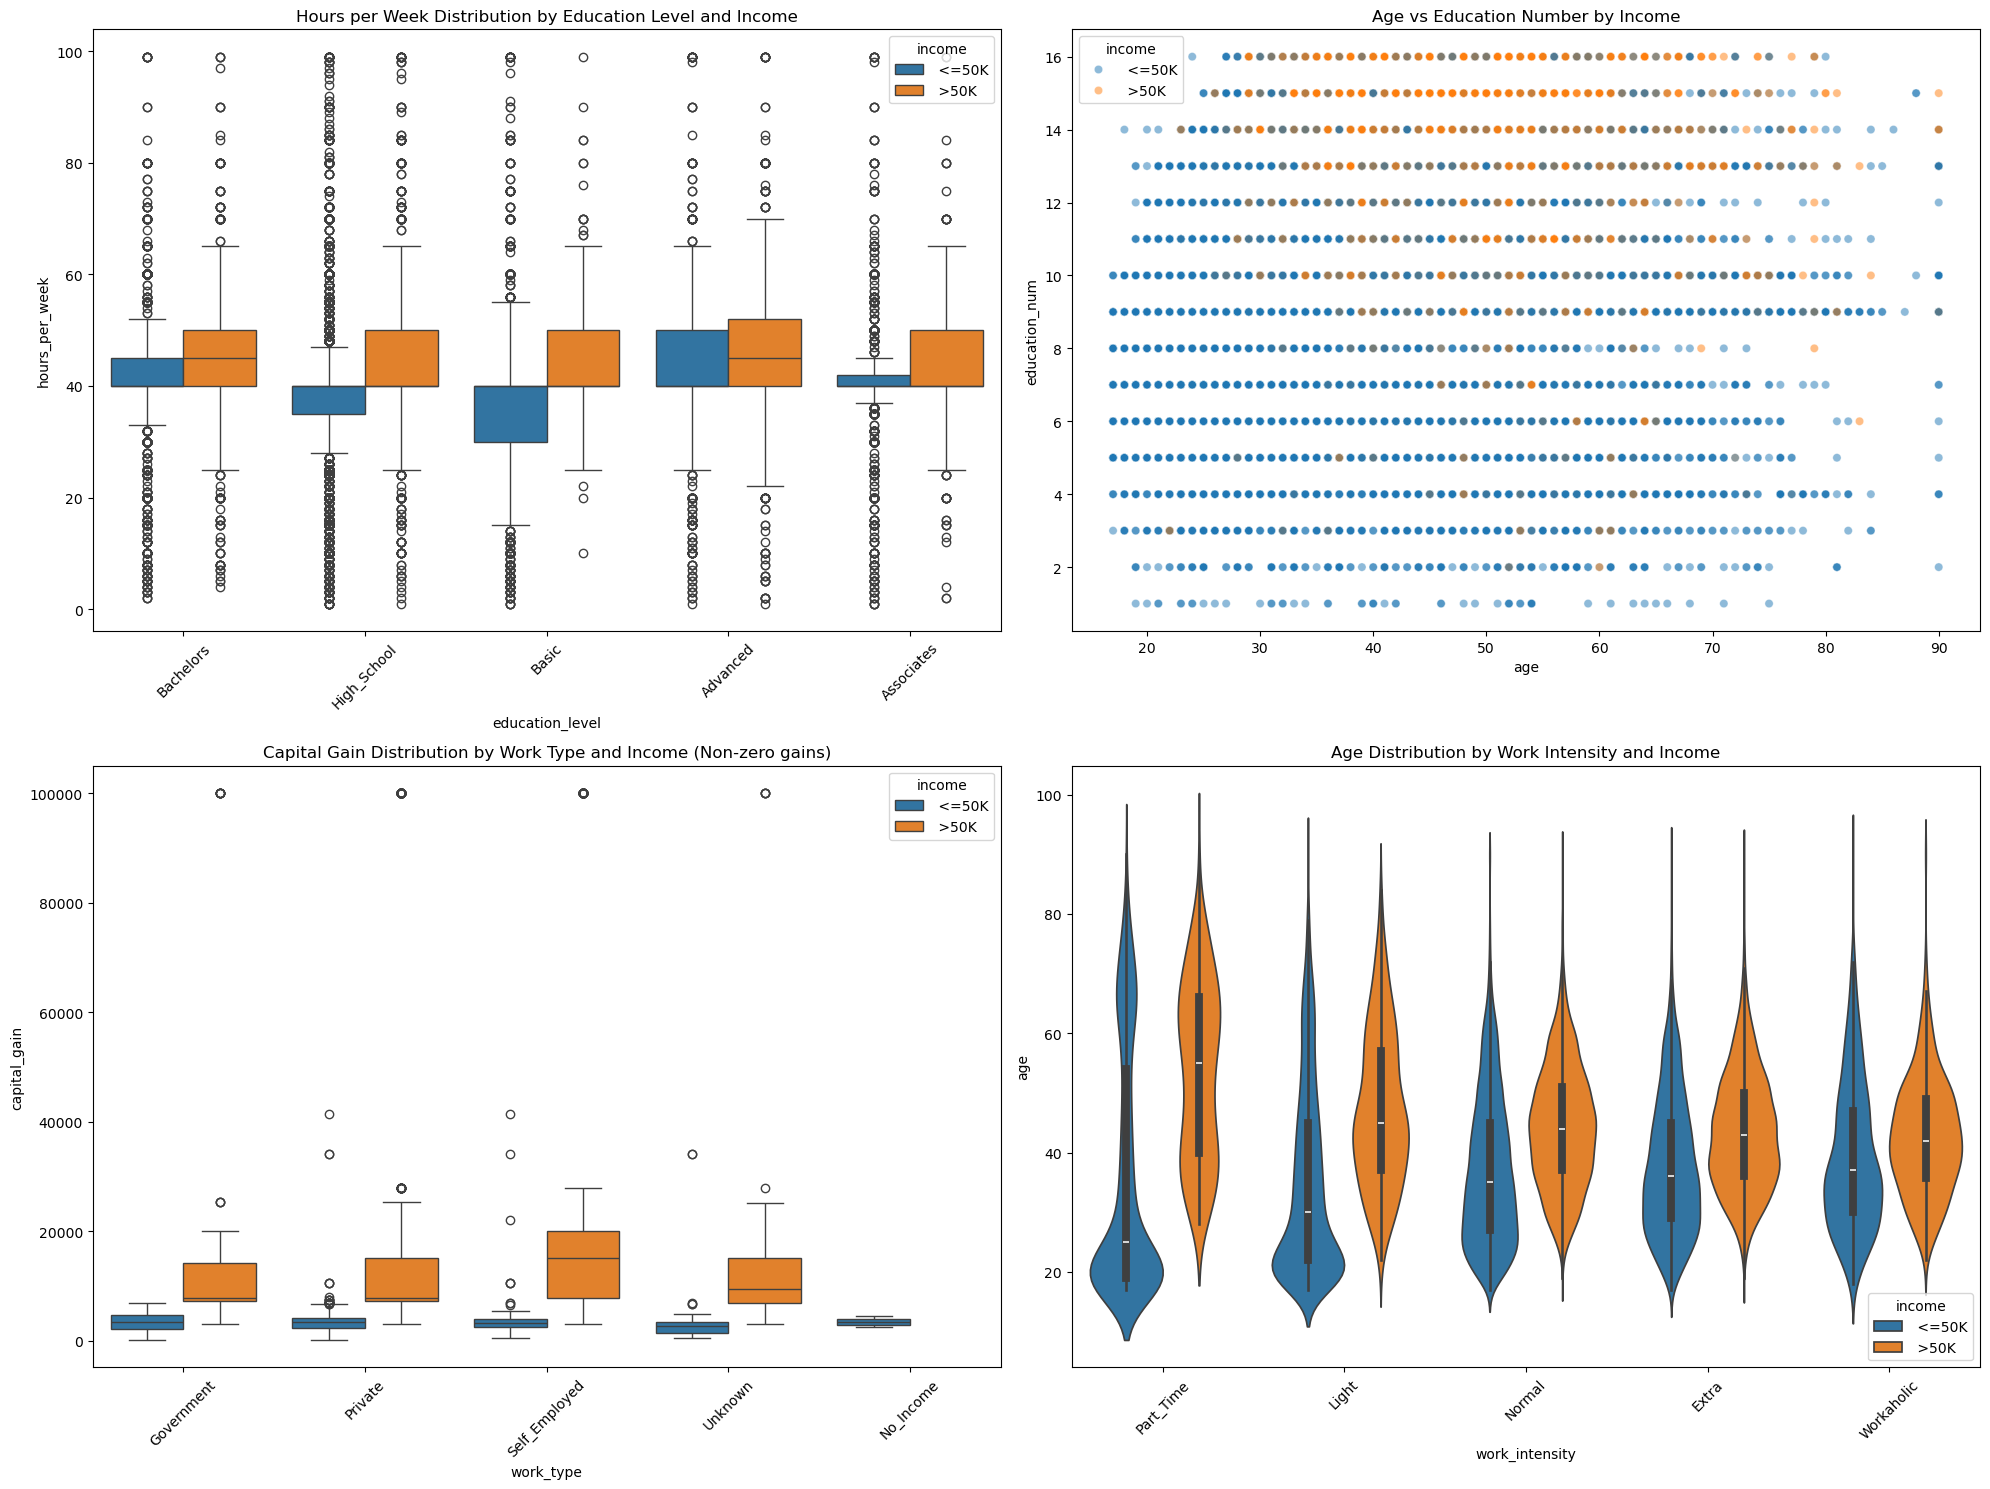


Percentage of High Income (>50K) by Education and Work Type:
work_type        Government  No_Income    Private  Self_Employed    Unknown
education_level                                                            
Advanced          56.821026        NaN  62.837838      72.000000  45.679012
Associates        29.661017        0.0  24.567474      30.158730  17.592593
Bachelors         36.183525        NaN  42.100817      49.702381  26.011561
Basic              7.112971        0.0   5.085803      14.627660   2.102804
High_School       20.900000        0.0  15.861426      28.056004   7.743786


In [ ]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Education level and hours per week by income
plt.subplot(2, 2, 1)
sns.boxplot(data=df_new, x='education_level', y='hours_per_week', hue='income')
plt.xticks(rotation=45)
plt.title('Hours per Week Distribution by Education Level and Income')

# 2. Age, Education Number, and Income
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_new, x='age', y='education_num', hue='income', alpha=0.5)
plt.title('Age vs Education Number by Income')

# 3. Work Type, Capital Gain, and Income
plt.subplot(2, 2, 3)
sns.boxplot(data=df_new[df_new['capital_gain'] > 0], 
            x='work_type', y='capital_gain', hue='income')
plt.xticks(rotation=45)
plt.title('Capital Gain Distribution by Work Type and Income (Non-zero gains)')

# 4. Hours per Week, Work Intensity, and Income
plt.subplot(2, 2, 4)
sns.violinplot(data=df_new, x='work_intensity', y='age', hue='income')
plt.xticks(rotation=45)
plt.title('Age Distribution by Work Intensity and Income')

plt.tight_layout()
plt.show()

# Additional analysis: Cross-tabulation of education level and work type by income
education_work_income = pd.crosstab([df_new['education_level'], df_new['work_type']], 
                                  df_new['income'], 
                                  normalize='index') * 100

# Display percentage of high income (>50K) by education level and work type
print("\nPercentage of High Income (>50K) by Education and Work Type:")
print(education_work_income[' >50K'].unstack())

**Key Insights**

1. Higher income is generally associated with longer working hours.
2. Education level appears to correlate with income.
3. Capital gains are significantly higher for the higher income group.
4. Age distributions vary by both work intensity and income level, with higher income individuals tending to be somewhat older.